In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing Dataset

In [41]:
data = pd.read_csv('sonar_data.txt', header = None)

In [42]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [47]:
sum(data.isna().any())

0

Above code results 0 which implies we have no NULL value in the data

## Dependent and Independent variable

In [4]:
X = data.drop(60,axis=1)
y=data[60]

## Separating testing and training

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train ,X_test , y_train,y_test = train_test_split(X,y,random_state =10 , test_size=0.2, stratify=y)

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
clf=LogisticRegression()

In [9]:
clf.fit(X_train,y_train)

LogisticRegression()

In [10]:
clf.score(X_train,y_train)

0.8072289156626506

The above score is the traning score

In [11]:
clf.score(X_test,y_test)

0.7380952380952381

The above score is the test score

In [12]:
y_pred = clf.predict(X_test)

In [13]:
y_pred

array(['M', 'M', 'R', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'R', 'M',
       'M', 'M', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'R', 'R', 'M', 'M',
       'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'R',
       'R', 'M', 'R'], dtype=object)

<AxesSubplot:>

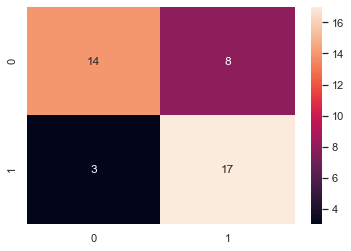

In [14]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [15]:
classification_report(y_test , y_pred)

'              precision    recall  f1-score   support\n\n           M       0.82      0.64      0.72        22\n           R       0.68      0.85      0.76        20\n\n    accuracy                           0.74        42\n   macro avg       0.75      0.74      0.74        42\nweighted avg       0.76      0.74      0.74        42\n'

## Random Forest

In [16]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Instantiate rf
rf = RandomForestClassifier(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=2)

In [17]:
rf.score(X_train, y_train)

1.0

The above score is the traning score

In [18]:
y_pred = rf.predict(X_test)

In [19]:
rf.score(X_test,y_test)

0.8333333333333334

The above score is the testing score

<AxesSubplot:>

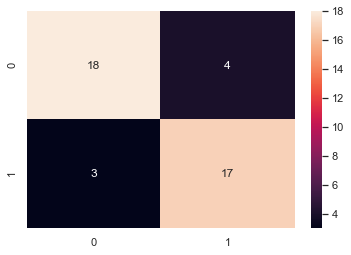

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [21]:
classification_report(y_test , y_pred)

'              precision    recall  f1-score   support\n\n           M       0.86      0.82      0.84        22\n           R       0.81      0.85      0.83        20\n\n    accuracy                           0.83        42\n   macro avg       0.83      0.83      0.83        42\nweighted avg       0.83      0.83      0.83        42\n'

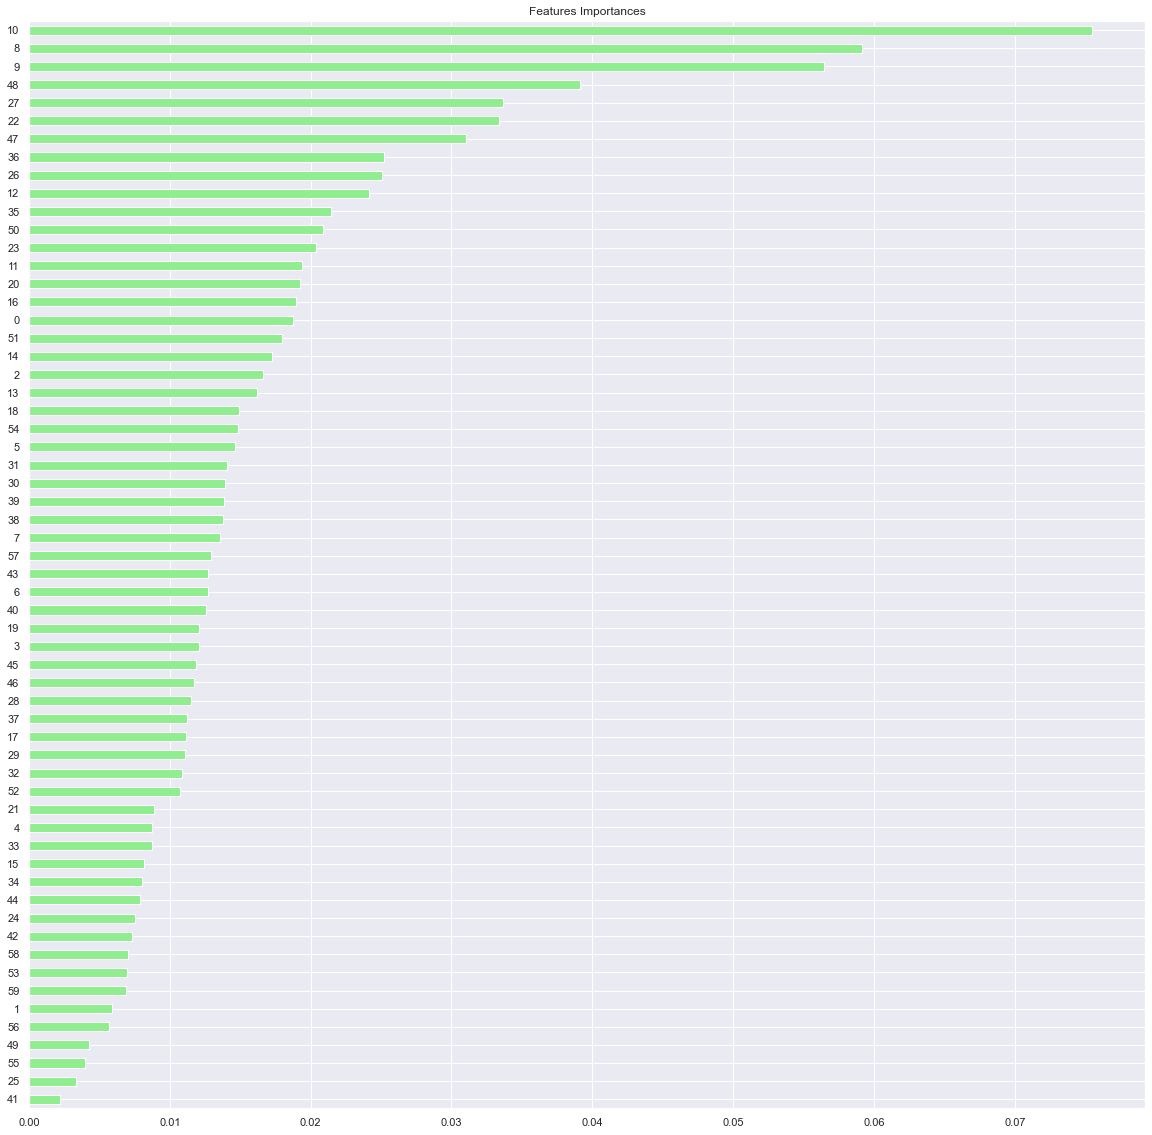

In [22]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen',figsize=(20,20))
plt.title('Features Importances')
plt.show()

## XGBoost

In [65]:
from xgboost import XGBClassifier

In [66]:
model = XGBClassifier()
model.fit(X_train, y_train)

[21:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
y_pred = model.predict(X_test)

In [68]:
model.score(X_train,y_train)

1.0

The above score is the traning score

In [69]:
model.score(X_test,y_test)

0.9285714285714286

The above score is the accuracy score of the testing set

<AxesSubplot:>

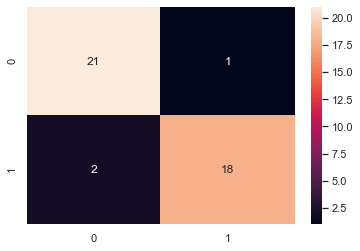

In [70]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [71]:
classification_report(y_test , y_pred)

'              precision    recall  f1-score   support\n\n           M       0.91      0.95      0.93        22\n           R       0.95      0.90      0.92        20\n\n    accuracy                           0.93        42\n   macro avg       0.93      0.93      0.93        42\nweighted avg       0.93      0.93      0.93        42\n'

#### Lastly comparing all the models , we got the highest accuracy from using the XGBoost which is 92.85% on the testing dataset